In [82]:
import numpy as np
import pandas as pd
import scipy as sp
from pandas import DataFrame, Series
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 400)
# For Visualization
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['image.cmap'] = 'viridis'
%matplotlib inline
import scipy.stats as stats
np.random.seed(78)
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10, 6)

In [83]:
t_max, t_min = 12, -10 
num_t_data = 150
noise_scale = 700
t_x = np.random.random((num_t_data,))*(t_max-t_min) + t_min
noise = np.random.randn(num_t_data)*noise_scale

In [84]:
t_mod_coeff = [4,-3, -1, 5]
t_y = np.polyval(t_mod_coeff,t_x)
pop_y = t_y+noise

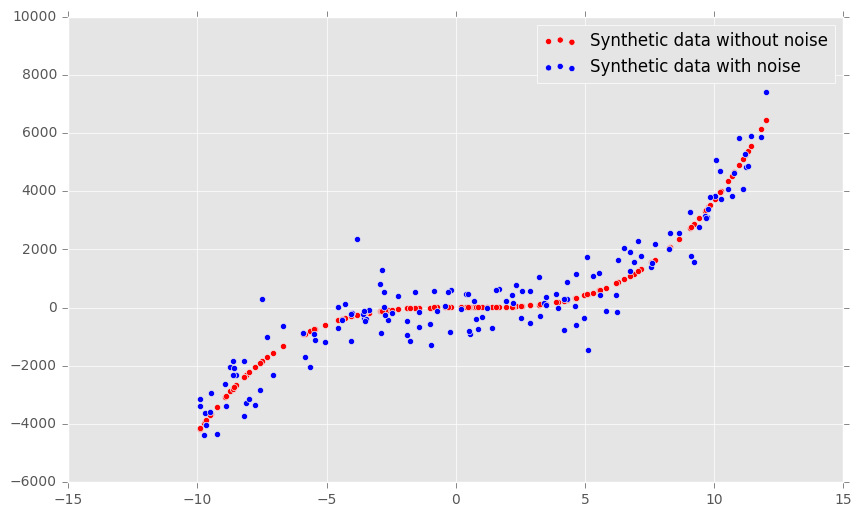

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(t_x,t_y,c='r',label='Synthetic data without noise')
ax.scatter(t_x,pop_y,c='b',label='Synthetic data with noise')
ax.legend()

In [86]:
num_sample = int(np.floor(num_t_data*.75))
num_sample


112

In [87]:
x_s = t_x[:num_sample]
y_s = pop_y[:num_sample]

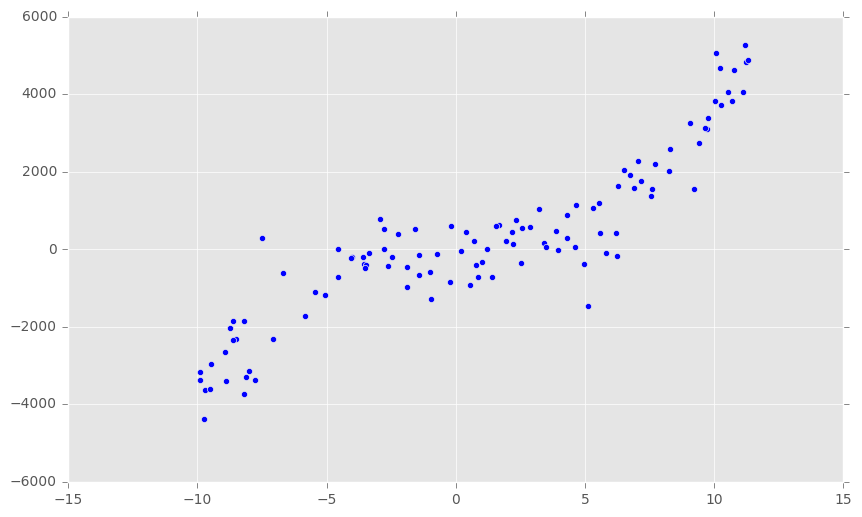

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_s,y_s,c='b')

In [89]:
fit_samp_n = int(np.floor(len(x_s)*.75))
fit_samp_n 

84

In [90]:
fit_x = x_s[:fit_samp_n ]
test_x = x_s[fit_samp_n:]
fit_y = y_s[:fit_samp_n ]
test_y = y_s[fit_samp_n:]

In [91]:
max_deg = 19
degs=np.arange(1,max_deg+1)
fit_coeff_list  = [np.polyfit(fit_x,fit_y, deg) for deg in degs]
domain_samples = np.linspace(fit_x.min(),fit_x.max(),100)
range_fit_curves = [np.polyval(fit_coeff,domain_samples) for fit_coeff in fit_coeff_list]

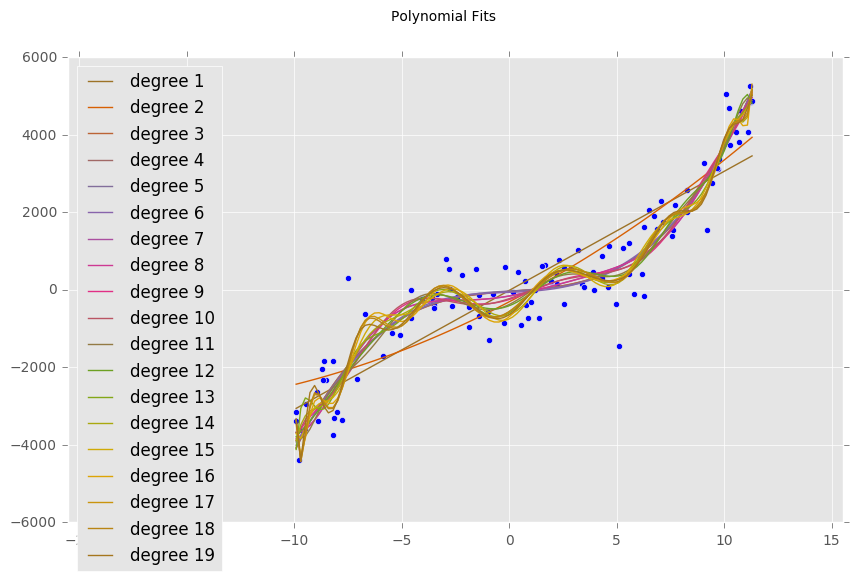

In [92]:
colors = plt.cm.Dark2(np.linspace(0.1,0.9,max_deg))
fig = plt.figure()
fig.suptitle('Polynomial Fits')
ax = fig.add_subplot(111)
ax.scatter(x_s,y_s,c='b')
for deg, (color, range_fit_curve) in enumerate(zip(colors,range_fit_curves)):
    ax.plot(domain_samples,range_fit_curve,color=color,label="degree "+str(deg+1))
ax.set_xlim(x_s.min()-((x_s.max()-x_s.min())*0.5),x_s.max()+((x_s.max()-x_s.min())*0.2))
ax.legend(loc=2)

In [93]:
fit_curve_y_by_degree = [np.polyval(fit_coeff,fit_x) for fit_coeff in fit_coeff_list]
residuals_by_degree = [fit_curve_y-fit_y for fit_curve_y in fit_curve_y_by_degree]
rmse_errors_by_degree = [np.sqrt((residuals**2).mean()) for residuals in residuals_by_degree]

test_curve_y_by_degree = [np.polyval(fit_coeff,test_x) for fit_coeff in fit_coeff_list]
test_residuals_by_degree = [fit_curve_y-test_y for fit_curve_y in test_curve_y_by_degree]
test_rmse_errors_by_degree = [np.sqrt((residuals**2).mean()) for residuals in test_residuals_by_degree]

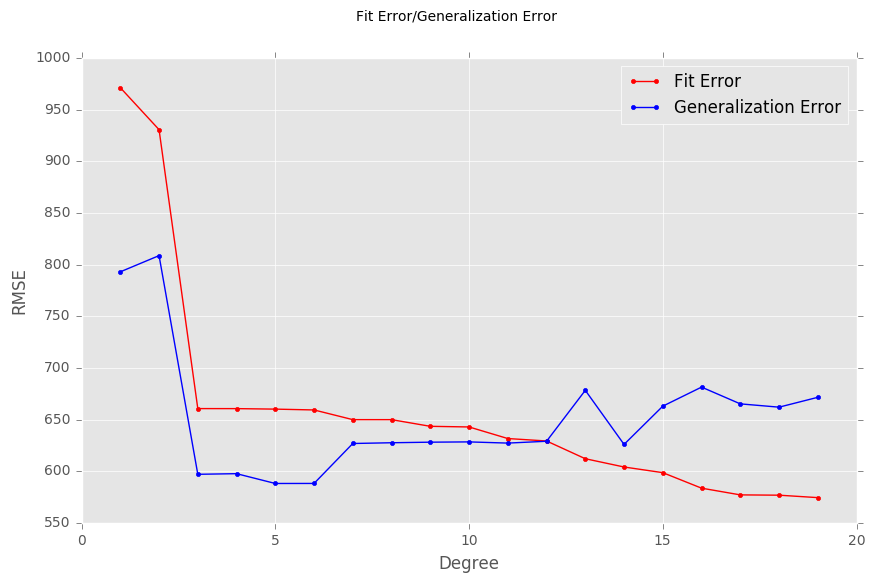

In [97]:
fig = plt.figure()
fig.suptitle('Fit Error/Generalization Error')
ax = fig.add_subplot(111)
ax.plot(range(1,max_deg),rmse_errors_by_degree,'r.-',label="Fit Error")
ax.plot(range(1,max_deg),test_rmse_errors_by_degree,'b.-',label="Generalization Error")
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
ax.legend()

In [102]:
min_err_degree = range(1,max_deg)[np.argmin(test_rmse_errors_by_degree)]
min_fit_coeff = fit_coeff_list[np.argmin(test_rmse_errors_by_degree)]

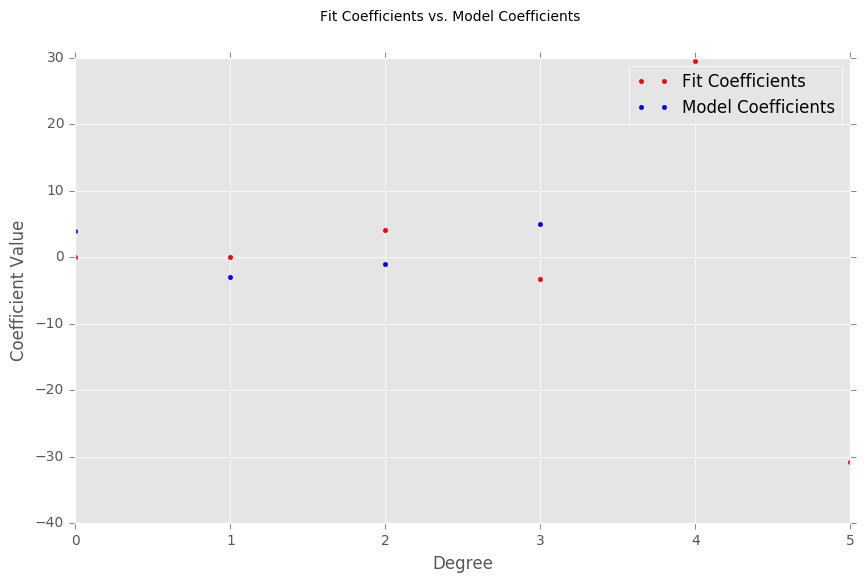

In [105]:
fig = plt.figure()
fig.suptitle('Fit Coefficients vs. Model Coefficients')
ax = fig.add_subplot(111)
ax.plot(min_fit_coeff,'r.',label='Fit Coefficients')
ax.plot(t_mod_coeff,'b.',label='Model Coefficients')
ax.set_xlabel('Degree')
ax.set_ylabel('Coefficient Value')
ax.legend()